<div style="width:100%; height:84px; padding-top:1rem; background-color:#232425;">
    <img style="display:block; width:301px; margin-left:auto; margin-right:auto;" src="https://geckodigital.co/wp-content/themes/geckodigital/assets/images/logo.svg">
</div>

# Gecko Digital VT's Loading Sepeed
## Episod 01
> The purpose of computing is insight, not numbers.

© Richard Hamming

## Intro

In this analytics episode we gonna look at the loading speed of VT for different countryes, devices, types of VT (multiresolution and regular 🤦‍♂️). In order to understand the user experience and fix long latency (ya it's spoiler, we have long latency for a bunch of regions).  

### Country
According to ⁨Lee, Ryan and Jacques requests we gonna focus on the following countries. And we'll add few more according to most popular visitors in GA4. So the city/country list for testing is:
- London, GBR
- Dubai, UAE
- Paris, FRA
- Sydney, AUS
- Frankfurt, DEU
- New York, USA
- Cape Town, ZAF  
### Device and VT's type
**Gecko GA4 user's devices:**
- **desktop** 50.661 %
- **mobile** 47.310 %

  
**For each location we have 4 tests**:
- **desktop** multires
- **desktop** regular (non-multires)
- **mobile** multires
- **mobile** regular (non-multires)


<p style="font-size:0.7rem">Just in case you wonering which VT's:
    <ul style="font-size:0.7rem">
        <li><a href="https://geckodigital.co/vt/ShangriLaTheFortManila/"><strong>multires</strong> → ShangriLaTheFortManila</a></li>
        <li><a href="https://geckodigital.co/vt/Hurawalhi/"><strong>non-multires</strong> → Hurawalhi</a></li>
    </ul>
</p>

### Connection Speed
We use **limited connection speed**, but `start from` speed which most users can have access to. Connection speed it's not the only important factor in terms of loading speed. **Latency of connection** which is related to location (or distance from user to our server) seems to bring more impact, when connection speed is well enough. We'll see it in the futher steps.  
  
**Two type of connection speed:**  
 - **desktop** Cable (5/1 Mbps 28ms RTT)
 - **mobile** LTE (12 Mbps, 70ms RTT)

### Measurements
To running tests we use [WebPageTest](https://www.webpagetest.org/). Each test we run 7 times in order to be a bit more statisticly precise.  
Right, it's 2 * 2 * 7 * 7 = 196 tests at the end.  
We measure `first view` only for all test. It means that we not caching any data. So we may get experience of users who interacts for the very first time with VT.

  
### Metrics
We use a few metrics in order to get a bit clearer understanding of user experience:
-  Largest Contentful Paint ([LCP](https://web.dev/lcp/)) by Google
||good|Needs Improvement|Poor|
|---|---|---|---|
|LCP|[0, 2500ms]|(2500ms, 4000ms]|over 4000ms
-  Speed Index ([SI](https://docs.webpagetest.org/metrics/speedindex/)) by WebPageTest

$$\large \mathsf{
SI = {\displaystyle \int^{end}_{0} 1 - \frac{VC}{100}}\small{, ms}
}
$$
**where**:  
SI - Speed Index, ms  
end - end time, ms  
VC - visual complete, %  

<hr>

### Let's Start 🛰️

In [1]:
import pandas as pd
import json
import glob
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# style MATPLOTLIBRC
%config InlineBackend.figure_formats = ['svg']

custom_params = {
                'figure.figsize': (10, 6),
                'figure.facecolor': '#232425',
                'figure.dpi': 240,

                'legend.frameon': False,
                'legend.borderpad': 1.4,
                'legend.labelspacing': 0.7,
                'legend.handlelength': 0.7,
                'legend.handleheight': 0.7,

                'axes.facecolor': '#232425',
                'axes.labelcolor': '#EEEEEE',
                'axes.labelpad': 17,
                'axes.spines.left': False,
                'axes.spines.bottom': False,
                'axes.spines.right': False,
                'axes.spines.top': False,
                'axes.grid': False,

                'contour.linewidth': 0.0,

                'xtick.color': '#AAAAAA',
                'ytick.color': '#AAAAAA',
                'xtick.bottom': True,
                'xtick.top': False,
                'ytick.left': True,
                'ytick.right': False,
    
                "lines.color": '#EEEEEE',

                'text.color': '#EEEEEE',
    
                'font.family': 'sans-serif',
            }

custom_cmap = mpl.colors.LinearSegmentedColormap(
    name='igo_gradient',
    segmentdata = {
        'red':   [(0.0, 0.30196078, 0.30196078),
                  (0.5, 0.94901961, 0.94901961),
                  (1.0, 0.84313725, 0.84313725)],
        'green': [(0.0, 0.61176471, 0.61176471),
                  (0.5, 0.62745098, 0.62745098),
                  (1.0, 0.21960784, 0.21960784)],
        'blue':  [(0.0, 0.62745098, 0.62745098),
                  (0.5, 0.11764706, 0.11764706),
                  (1.0, 0.38431373, 0.38431373)],
        'alpha': [(0.0,1.0,1.0),
                  (1.0,1.0,1.0)]
    },
    N=256,
)

topia = np.array([77, 156, 160]) / 255
gecko = np.array([215, 56, 98]) / 255
gold = np.array([242, 160, 30]) / 255
water = np.array([88, 162, 216]) / 255
outer_space = np.array([67, 70, 71]) / 255

palette_igo_a = np.array([84, 171, 177]) / 255
palette_igo_b = np.array([177, 121, 84]) / 255
palette_igo_c = np.array([82,111, 112]) / 255
palette_igo_d = np.array([91, 81, 74]) / 255
 
des_color = gecko
mob_color = topia
tab_color = gold
dim_color = 'dimgrey'
grey_color = 'grey'
dod_blue = 'dodgerblue'

constants:

In [3]:
AUS_PATH = './datasets/aus/'
DEU_PATH = './datasets/deu/'
FRA_PATH = './datasets/fra/'
GBR_PATH = './datasets/gbr/'
UAE_PATH = './datasets/uae/'
USA_PATH = './datasets/usa/'
ZAF_PATH = './datasets/zaf/'

PATTERN_CSV = '*.csv'

url_mres = 'https://geckodigital.co/vt/ShangriLaTheFortManila/'

ISO_COUNTRY = {
    'aus': 'Australia',
    'deu': 'Germany',
    'fra': 'France',
    'gbr': 'United Kingdom',
    'uae': 'United Arab Emirates',
    'usa': 'United States',
    'zaf': 'South Africa',
}

functions:

In [4]:
def pull_data(path, pattern, columns, url_mres):
    pulled_df = pd.DataFrame(columns=columns)
    files_list = glob.glob(path+pattern)
    for csv in files_list:
        current_df = pd.read_csv(csv).loc[: , columns]
        if pulled_df.empty:
            pulled_df = current_df
        else:
            pulled_df = pd.concat([pulled_df, current_df], axis=0, ignore_index=True)
        # display(current_df)
    pulled_df.loc[: , 'is_multires'] = pulled_df.loc[: , 'document_URL'].apply(
        lambda url: True if url==url_mres else False
    )
    pulled_df.loc[: , 'is_desktop'] = pulled_df.loc[: , 'Dpi'].apply(
        lambda dpi: True if int(json.loads(dpi)['dpi'])==96 else False
    )
    pulled_df.drop(columns=['document_URL', 'Dpi'], inplace=True)
    
    return pulled_df
    # return files_list

<hr>

## User's Devices

### From Gecko GA4

In [5]:
users_platform_df = pd.read_csv(
    './datasets/user_by_platform_1st_2month.csv',
    header=16,
    usecols=[0,1],
    names=['platform', 'users']
)
users_platform_df.loc[: , 'users_pct'] = round(
        users_platform_df.loc[: , 'users'].copy()
        * 100
        / users_platform_df.loc[: , 'users'].sum()
        , 3
    )
display(users_platform_df)

,platform,users,users_pct
0,desktop,41804,50.661
1,mobile,39039,47.310
2,tablet,1665,2.018
3,smart tv,9,0.011


`According to the GA4 on geckodigital.co website, from Jan 21 → Mar 22 2024`

### From StatCounter Global Stats

In [6]:
stat_count_pltfrm = pd.read_csv(
    './datasets/comparison-eu-monthly-202302-202402.csv',
    index_col=0,
    header=0,
    names=['date', 'mobile', 'desktop', 'tablet']
)

stat_count_pltfrm.set_index(
    pd.to_datetime(stat_count_pltfrm.index),
    inplace=True,
)
stat_count_pltfrm.set_index(
    stat_count_pltfrm.index.strftime('%b %y'),
    inplace=True,
)

display(stat_count_pltfrm)

,mobile,desktop,tablet
date,,,
Feb 23,49.37,48.11,2.51
Mar 23,49.22,48.25,2.53
Apr 23,47.84,49.71,2.45
May 23,46.68,51.06,2.26
Jun 23,51.80,45.73,2.47
Jul 23,53.52,43.91,2.58
Aug 23,51.81,45.72,2.47
Sep 23,49.59,48.16,2.25
Oct 23,51.13,46.71,2.16


Percent of users device type monthly, for the last year.

Let's see on the last year graph:

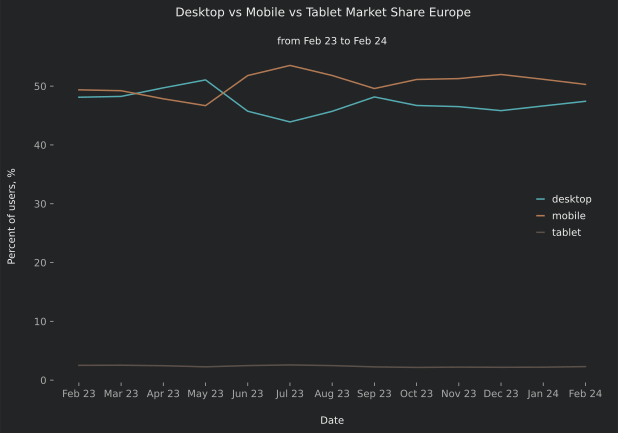

In [7]:
with mpl.rc_context(custom_params):
    fig = plt.figure()
    
    plt.plot(stat_count_pltfrm['desktop'], label='desktop', color=palette_igo_a)
    plt.plot(stat_count_pltfrm['mobile'], label='mobile', color=palette_igo_b)
    plt.plot(stat_count_pltfrm['tablet'], label='tablet', color=palette_igo_d)

    plt.suptitle('Desktop vs Mobile vs Tablet Market Share Europe')
    plt.title(
        f'from {stat_count_pltfrm.index[0]} to {stat_count_pltfrm.index[-1]}',
        fontdict={'horizontalalignment':'center','size': 10}
    )
    plt.xlabel('Date')
    plt.ylabel('Percent of users, %')
    
    plt.legend(loc='right')
    plt.show()

According to the graph above most people prefer descktop and mobile almost equaly and much offten than tablet.  
Median of registred tablet's internet surfers during last year it's just **2.3%** 🤷‍♂️  
<p style="font-size:0.77rem">by <a href="https://gs.statcounter.com/platform-market-share/desktop-mobile-tablet/europe">StatCounter Global Stats - View desktop vs mobile vs tablet market share by region Europe</a></p>

### Compare Gecko Users with Europe Statistics

Let's see Gecko's consumers behavior compared with Europe Statistics by device on the graph:

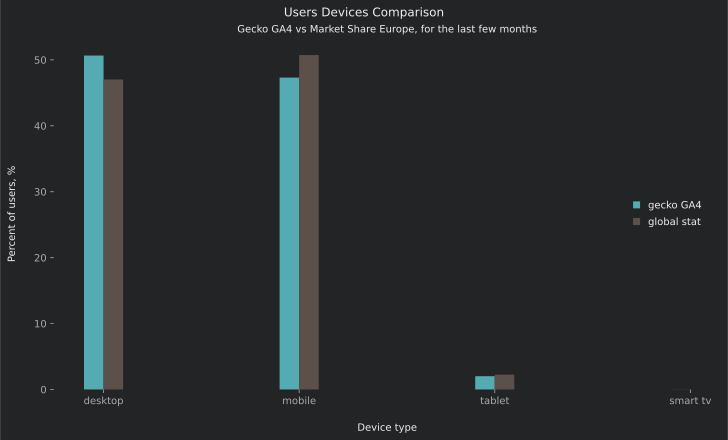

In [8]:
compare_stats = pd.concat(
    [users_platform_df.set_index('platform'),
    stat_count_pltfrm.iloc[-2 : , :].median().rename('median_pct')],
    axis=1
)

dev_count = len(compare_stats.index)
width = 0.125
 # + np.linspace(0, 1.5, num=4,)
dev_axis = np.array(range(4)) + np.linspace(0, 0.75, num=4,) #np.arange(dev_count)


ga_users = compare_stats.loc[: , 'users_pct']
eu_users = compare_stats.loc[: , 'median_pct']


with mpl.rc_context(custom_params):
    fig, ax = plt.subplots(layout='constrained')
    ax.bar(
        dev_axis-width/2,
        ga_users,
        width=width,
        align='center',
        color=palette_igo_a,
        label='gecko GA4'
    )
    ax.bar(
        dev_axis+width/2,
        eu_users,
        width=width,
        align='center',
        color=palette_igo_d,
        label='global stat'
    )

    plt.suptitle('Users Devices Comparison')
    plt.title(
        f'Gecko GA4 vs Market Share Europe, for the last few months',
        fontdict={'horizontalalignment':'center','size': 10}
    )
    ax.set_xticks(dev_axis, compare_stats.index)
    plt.xlabel('Device type')
    plt.ylabel('Percent of users, %')
    
    plt.legend(loc='right')
    
    plt.show()

As a spreadsheet:

In [9]:
display(compare_stats.loc[: , ['users_pct', 'median_pct']])

,users_pct,median_pct
desktop,50.661,47.025
mobile,47.310,50.725
tablet,2.018,2.250
smart tv,0.011,NaN


Wow, it's fun that mobile and descktop users from Gecko it's just switched Europe Stat.  
Seems like Gecko users prefer desktops slightly more, than average europeans.  
Hopefully they are determined to book hotels..  
And 9 users on Gecko from smart TV 📺

<hr>

## The Loading Time

Metrics to check:
- `chromeUserTiming.LargestContentfulPaint`
- `SpeedIndex`
- `chromeUserTiming.LargestImagePaint`
- `render`
- `document_URL`
- `Dpi`
- `tester`
- `base_page_ip_ptr`

In [10]:
lcp = 'chromeUserTiming.LargestContentfulPaint'
si = 'SpeedIndex'

columns_to_analyse = [
    lcp,
    si,
    'chromeUserTiming.LargestImagePaint',
    'render',
    'document_URL',
    'Dpi',
    'tester',
    'base_page_ip_ptr',
    'TotalBlockingTime',
]

**Load data from tests:**

In [11]:
aus_df = pull_data(
        path=AUS_PATH,
        pattern=PATTERN_CSV,
        columns=columns_to_analyse,
        url_mres=url_mres
)
deu_df = pull_data(
        path=DEU_PATH,
        pattern=PATTERN_CSV,
        columns=columns_to_analyse,
        url_mres=url_mres
)
fra_df = pull_data(
        path=FRA_PATH,
        pattern=PATTERN_CSV,
        columns=columns_to_analyse,
        url_mres=url_mres
)
gbr_df = pull_data(
        path=GBR_PATH,
        pattern=PATTERN_CSV,
        columns=columns_to_analyse,
        url_mres=url_mres
)
uae_df = pull_data(
        path=UAE_PATH,
        pattern=PATTERN_CSV,
        columns=columns_to_analyse,
        url_mres=url_mres
)
usa_df = pull_data(
        path=USA_PATH,
        pattern=PATTERN_CSV,
        columns=columns_to_analyse,
        url_mres=url_mres
)
zaf_df = pull_data(
        path=ZAF_PATH,
        pattern=PATTERN_CSV,
        columns=columns_to_analyse,
        url_mres=url_mres
)

lcp_summ = pd.concat(
    [
        aus_df.rename(columns={lcp: 'aus'}).groupby(by=['is_desktop', 'is_multires'])['aus'].median(),
        deu_df.rename(columns={lcp: 'deu'}).groupby(by=['is_desktop', 'is_multires'])['deu'].median(),
        fra_df.rename(columns={lcp: 'fra'}).groupby(by=['is_desktop', 'is_multires'])['fra'].median(),
        gbr_df.rename(columns={lcp: 'gbr'}).groupby(by=['is_desktop', 'is_multires'])['gbr'].median(),
        uae_df.rename(columns={lcp: 'uae'}).groupby(by=['is_desktop', 'is_multires'])['uae'].median(),
        usa_df.rename(columns={lcp: 'usa'}).groupby(by=['is_desktop', 'is_multires'])['usa'].median(),
        zaf_df.rename(columns={lcp: 'zaf'}).groupby(by=['is_desktop', 'is_multires'])['zaf'].median(),
    ],
        axis=1         
)

si_summ = pd.concat(
    [
        aus_df.rename(columns={si: 'aus'}).groupby(by=['is_desktop', 'is_multires'])['aus'].median(),
        deu_df.rename(columns={si: 'deu'}).groupby(by=['is_desktop', 'is_multires'])['deu'].median(),
        fra_df.rename(columns={si: 'fra'}).groupby(by=['is_desktop', 'is_multires'])['fra'].median(),
        gbr_df.rename(columns={si: 'gbr'}).groupby(by=['is_desktop', 'is_multires'])['gbr'].median(),
        uae_df.rename(columns={si: 'uae'}).groupby(by=['is_desktop', 'is_multires'])['uae'].median(),
        usa_df.rename(columns={si: 'usa'}).groupby(by=['is_desktop', 'is_multires'])['usa'].median(),
        zaf_df.rename(columns={si: 'zaf'}).groupby(by=['is_desktop', 'is_multires'])['zaf'].median(),
    ],
        axis=1         
)

### `LargestContentfulPaint`

We gonna use **median of 7 tests** as parameter to compare with.

In [12]:
display(lcp_summ)

aus     deu     fra     gbr     uae     usa     zaf
is_desktop is_multires                                                        
False      False        8657.0  4604.0  3489.0  3427.0  7274.0  4211.0  6601.0
           True         8106.0  3256.0  3369.0  3006.0  7005.5  4030.0  5915.0
True       False        8181.0  4138.0  3512.0  5539.0  5960.0  4503.0  6510.0
           True         7652.5  3347.0  3324.0  2953.0  5199.0  3195.0  5583.0

In the spreadsheet above `LargestContentfulPaint` median by country, device, VT's type.  
  
Let's see the `LargestContentfulPaint` on the graph:

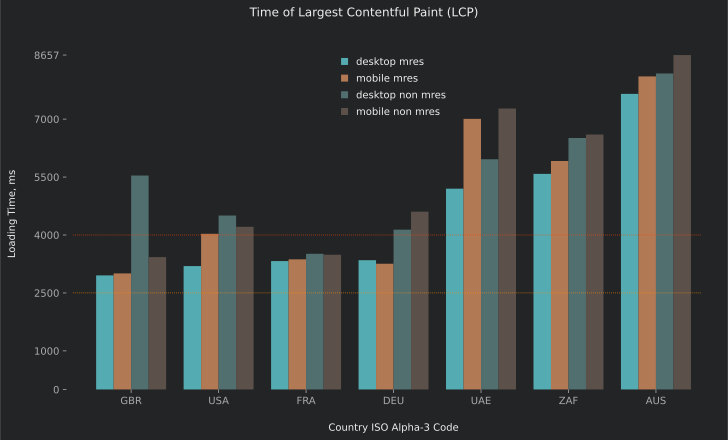

In [13]:
# lcp_summ

dev_count = len(lcp_summ.index)
width = 0.25
dev_axis = np.array(range(7)) + np.linspace(0, 1.5, num=7,)#np.arange(dev_count)

countries_sorted = lcp_summ.loc[(True, True)].sort_values().index
countries_sorted = [c.upper() for c in countries_sorted]

with mpl.rc_context(custom_params):
    fig, ax = plt.subplots(layout='constrained')
        
    for i in range(len(countries_sorted)):
        country_code = countries_sorted[i].lower()
        country_pos = dev_axis[i]
        lcp_summ_desc_mul = lcp_summ.loc[(True, True), country_code]
        lcp_summ_desc_non = lcp_summ.loc[(True, False), country_code]
        lcp_summ_mob_mul = lcp_summ.loc[(False, True), country_code]
        lcp_summ_mob_non = lcp_summ.loc[(False, False), country_code]
        ax.bar(
            country_pos-(width*1.5),
            # dev_axis-(2*width),
            lcp_summ_desc_mul,
            width=width,
            align='center',
            color=palette_igo_a,
            # label='gecko GA4'
        )
        ax.bar(
            country_pos-(width*0.5),
            # dev_axis-width,
            lcp_summ_mob_mul,
            width=width,
            align='center',
            color=palette_igo_b,
            # label='gecko GA4'
        )
        ax.bar(
            country_pos+(width*0.5),
            # dev_axis+width,
            lcp_summ_desc_non,
            width=width,
            align='center',
            color=palette_igo_c,
            # label='global stat'
        )
    
        ax.bar(
            country_pos+(width*1.5),
            # dev_axis+(2*width),
            lcp_summ_mob_non,
            width=width,
            align='center',
            color=palette_igo_d, #outer_space,
            # label='global stat'
        )

    plt.suptitle('Time of Largest Contentful Paint (LCP)')
    plt.title(f' ', fontdict={'horizontalalignment':'left','size': 10})
    ax.set_xticks(dev_axis, countries_sorted)
    ax.set_yticks([0, 1_000, 2_500, 4_000, 5_500, 7_000, int(lcp_summ.max().max())])
    plt.xlabel('Country ISO Alpha-3 Code')
    plt.ylabel('Loading Time, ms')
    
    plt.legend(
        [
            'desktop mres',
            'mobile mres',
            'desktop non mres',
            'mobile non mres'
        ],
        loc='upper center'
    )

    colors_speed = ['forestgreen', 'darkorange', 'orangered']
    plt.axhline(
        2500,
        xmin=0.01,
        xmax=0.97,
        color=colors_speed[1],
        linestyle=':',
        linewidth=.75
    )
    plt.axhline(
        4000,
        xmin=0.01,
        xmax=0.97,
        color=colors_speed[2],
        linestyle=':',
        linewidth=.75
    )
    
    plt.show()

> below 2500ms → good  
> from 2500ms to 4000ms → needs improvement  
> over 4000ms → poor  

Users from GBR, USA, FRA, DEU getting access to VT faster than for 4 seconds. Which is not that bad as we loading VT, not an regular html page.  
  
But UAE, ZAF, AUS consumers are not that lucky. They are above the red 4 seconds line. Definitely some backend improvements needed.

### `SpeedIndex`

We gonna use **median of 7 tests** as parameter to compare with.

In [14]:
display(si_summ)

aus     deu     fra     gbr     uae     usa     zaf
is_desktop is_multires                                                        
False      False        9202.0  4533.0  4252.0  3983.0  7873.0  5199.0  7079.0
           True         9555.0  4839.0  8974.0  8502.0  9356.0  4731.0  7343.0
True       False        7614.0  3544.0  3318.0  4734.0  5527.0  3937.0  5622.0
           True         7641.0  3539.0  3701.0  3009.0  5643.0  3518.0  5678.0

In the spreadsheet above `SpeedIndex` median by country, device, VT's type.  
  
Let's see the `SpeedIndex` on the graph:

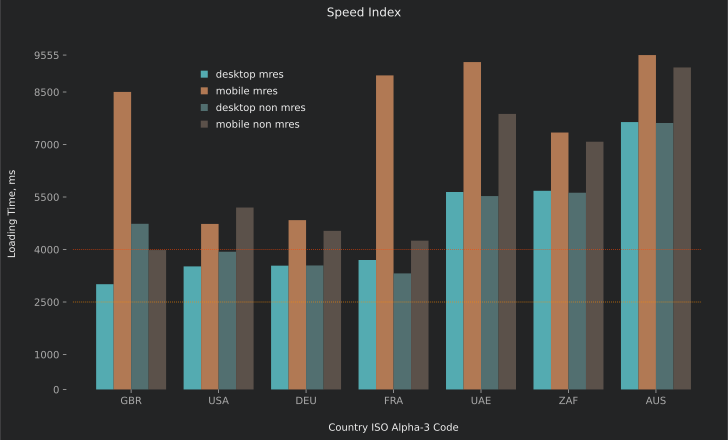

In [15]:
# si_summ

dev_count = len(si_summ.index)
width = 0.25
dev_axis = np.array(range(7)) + np.linspace(0, 1.5, num=7,)

countries_sorted = si_summ.loc[(True, True)].sort_values().index
countries_sorted = [c.upper() for c in countries_sorted]

with mpl.rc_context(custom_params):
    fig, ax = plt.subplots(layout='constrained')
        
    for i in range(len(countries_sorted)):
        country_code = countries_sorted[i].lower()
        country_pos = dev_axis[i]
        si_summ_desc_mul = si_summ.loc[(True, True), country_code]
        si_summ_desc_non = si_summ.loc[(True, False), country_code]
        si_summ_mob_mul = si_summ.loc[(False, True), country_code]
        si_summ_mob_non = si_summ.loc[(False, False), country_code]
        ax.bar(
            country_pos-(width*1.5),
            si_summ_desc_mul,
            width=width,
            align='center',
            color=palette_igo_a,
        )
        ax.bar(
            country_pos-(width*0.5),
            si_summ_mob_mul,
            width=width,
            align='center',
            color=palette_igo_b,
        )
        ax.bar(
            country_pos+(width*0.5),
            si_summ_desc_non,
            width=width,
            align='center',
            color=palette_igo_c,
        )
    
        ax.bar(
            country_pos+(width*1.5),
            si_summ_mob_non,
            width=width,
            align='center',
            color=palette_igo_d,
        )

    plt.suptitle('Speed Index')
    plt.title(f' ', fontdict={'horizontalalignment':'left','size': 10})
    ax.set_xticks(dev_axis, countries_sorted)
    ax.set_yticks([0, 1_000, 2_500, 4_000, 5_500, 7_000, 8_500, int(si_summ.max().max())])
    plt.xlabel('Country ISO Alpha-3 Code')
    plt.ylabel('Loading Time, ms')
    
    plt.legend(
        [
            'desktop mres',
            'mobile mres',
            'desktop non mres',
            'mobile non mres'
        ],
        loc=[0.1840,0.70]# 'best'
    )

    colors_speed = ['forestgreen', 'darkorange', 'orangered']
    plt.axhline(
        2500,
        xmin=0.01,
        xmax=0.97,
        color=colors_speed[1],
        linestyle=':',
        linewidth=.75
    )
    plt.axhline(
        4000,
        xmin=0.01,
        xmax=0.97,
        color=colors_speed[2],
        linestyle=':',
        linewidth=.75
    )
    
    plt.show()

> below 2500ms → good  
> from 2500ms to 4000ms → needs improvement  
> over 4000ms → poor  

Same pattern as for `Largest Contentful Paint (LCP)`, but on the mobile multires time seems strangely long.. **We'll look deeper on it in Episode 2.**
> Users from GBR, USA, FRA, DEU getting access to VT faster than for 4 seconds. Which is not that bad as we loading VT, not an regular html page.  
  
> But UAE, ZAF, AUS consumers are not that lucky. They are above the red 4 seconds line. Definitely some backend improvements needed.

<hr>

## Who's Watching 😶‍🌫️

### Promising Countries

Countries with more than **2000** `new users` from 21 Feb to 24 Mar:

In [16]:
countries_df = pd.read_csv(
    './datasets/country.csv',
    header=9,
    index_col=0,
)
total_new_users = countries_df.loc[: , 'New users'].sum()

In [17]:
promising_countries = countries_df.loc[
        countries_df.loc[:, 'New users'] >= 2000,
        'New users'
    ]
total_procountr_users = promising_countries.sum()

display(pd.DataFrame(promising_countries))
print()
print(
    len(promising_countries.index),
    'countries with total amount of new users',
     total_procountr_users,
    end='.\n'
)
print('It\'s {:.2%} of all Gecko\'s new users.'
    .format(total_procountr_users / total_new_users)
)

,New users
Country,
United States,9373
United Kingdom,8383
Australia,7650
Singapore,6255
Germany,6065
Malaysia,4665
Philippines,4509
South Africa,3526
Italy,2722



12 countries with total amount of new users 59725.
It's 66.54% of all Gecko's new users.


The top 12 countries by `New users` on the graph:

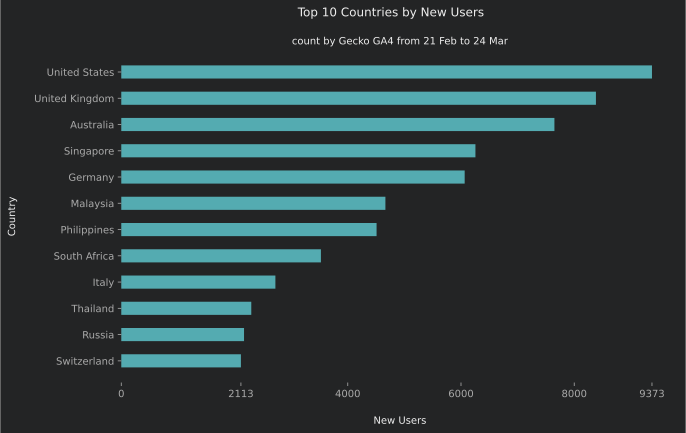

In [18]:
with mpl.rc_context(custom_params):
    fig, ax = plt.subplots() # layout='constrained')
    ax.barh(
            promising_countries.index,
            width=promising_countries,
            # si_summ_mob_non,
            height=(1/len(countries_df.index[:10]))*5,
            align='center',
            color=palette_igo_a,
        )
    ax.invert_yaxis()
    plt.suptitle('Top 10 Countries by New Users')
    plt.title(f'count by Gecko GA4 from 21 Feb to 24 Mar', fontdict={'horizontalalignment':'center','size': 10})
    # ax.set_xticks(dev_axis, countries_sorted)
    ax.set_xticks([0, promising_countries.min(), 4_000, 6_000, 8_000, promising_countries.max()])
    plt.xlabel('New Users')
    plt.ylabel('Country')
    
    plt.show()

### 7 Countries from Research

Countries from research by `New users` on the graph::

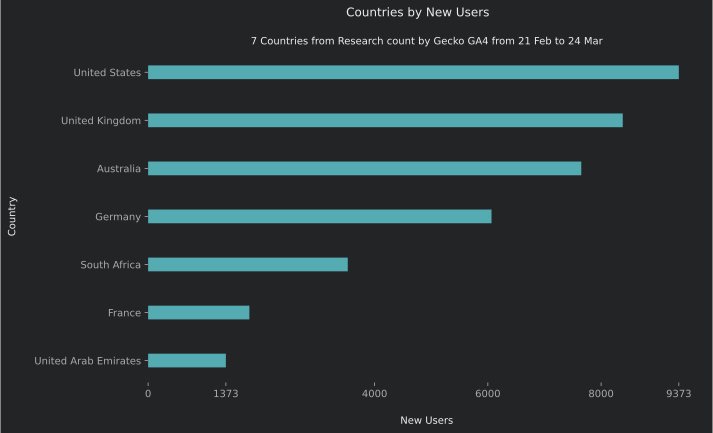

In [19]:
indx_research_sort = (
        countries_df.loc[ISO_COUNTRY.values(), : ]
        .sort_values(by='New users', ascending=False)
        .index
    )

with mpl.rc_context(custom_params):
    fig, ax = plt.subplots() # layout='constrained')
    ax.barh(
            indx_research_sort,
            width=countries_df.loc[indx_research_sort , 'New users'],
            # si_summ_mob_non,
            height=(1/len(indx_research_sort))*2,
            align='center',
            color=palette_igo_a,
        )
    ax.invert_yaxis()
    plt.suptitle('Countries by New Users')
    plt.title(
        f'7 Countries from Research count by Gecko GA4 from 21 Feb to 24 Mar',
        fontdict={'horizontalalignment':'center','size': 10}
    )
    # ax.set_xticks(dev_axis, countries_sorted)
    ax.set_xticks(
        [
            0,
            countries_df.loc[indx_research_sort, 'New users'].min(),
            4_000,
            6_000,
            8_000,
            countries_df.loc[indx_research_sort , 'New users'].max()
        ]
    )
    plt.xlabel('New Users')
    plt.ylabel('Country')
    
    plt.show()

In [20]:
research_countries = countries_df.loc[
        indx_research_sort,
        'New users'
    ]
total_research = research_countries.sum()
display(pd.DataFrame(research_countries))
print()
print(
    len(indx_research_sort),
    'countries with total amount of new users',
    total_research,
    end='.\n'
)
print('It\'s {:.2%} of all Gecko\'s new users.'
    .format(total_research / total_new_users)
)

,New users
Country,
United States,9373
United Kingdom,8383
Australia,7650
Germany,6065
South Africa,3526
France,1788
United Arab Emirates,1373



7 countries with total amount of new users 38158.
It's 42.51% of all Gecko's new users.


##### Countries from Research with Slow Loading

In [21]:
slow_conn_users = countries_df.loc[
        [
            'Australia',
            'South Africa',
            'United Arab Emirates'
        ],
        'New users'
    ]
total_slow_users = slow_conn_users.sum()

display(pd.DataFrame(slow_conn_users))
print()
print(
    len(slow_conn_users.index),
    'countries with total amount of new users',
     total_slow_users,
    end='.\n'
)
print('It\'s {:.2%} of all new users.'
    .format(total_slow_users / total_new_users)
)

,New users
Country,
Australia,7650
South Africa,3526
United Arab Emirates,1373



3 countries with total amount of new users 12549.
It's 13.98% of all new users.


Amount of consumers from countries, which has VT's loading time **over 4 seconds**.  
At least 13.98% of all Gecko's consumers, from tested countries, experience VT loading over 4 seconds.  
  
**Sorry, ya.**

### Promising Countries Didn't Covered by Research

In [22]:
did_not_research = promising_countries.loc[
    list(set(promising_countries.index)
    - set(ISO_COUNTRY.values()))
].sort_values(ascending=False)

total_didntcover_users = did_not_research.sum()

display(pd.DataFrame(did_not_research))
print()
print(
    len(did_not_research.index),
    'countries with total amount of new users',
    total_didntcover_users,
    end='.\n'
)
print('It\'s {:.2%} of all Gecko\'s new users.'
    .format(total_didntcover_users / total_new_users)
)

,New users
Country,
Singapore,6255
Malaysia,4665
Philippines,4509
Italy,2722
Thailand,2296
Russia,2168
Switzerland,2113



7 countries with total amount of new users 24728.
It's 27.55% of all Gecko's new users.


<hr>

## Conclusion

Our VT's loading speed leaves much to be desired.  
It's somehow okay for the:

- United Kingdom
- France
- Germany
- United States

  
And far from best practice for the:
- South Africa
- Australia
- United Arab Emirates

In [23]:
display(
    pd.DataFrame(
        np.rint(lcp_summ.median().sort_values()),
        columns=['miliseconds'],
        dtype='int'
    )
)
print()
print('Median of loading time by country.')

,miliseconds
gbr,3216
fra,3429
deu,3742
usa,4120
zaf,6212
uae,6483
aus,8144



Median of loading time by country.


### Targeted Countries With Slow VT's Speed

As discovored by research, at least **13.98%** of all `new users` experience VT loading over 4 seconds up to 9 seconds.  
  
|country|new users|
|--:|:--:|
|Australia|7650|
|South Africa|3526|
|United Arab Emirates|1373|
  
3 countries with total amount of new users 12549.

### Promising Countries

Even if we do not targeting this countries it's **17.19%** of our end consumers. And with high probability they experiencing slow VT's speed.
|country|new users|
|--:|:--:|
|Singapore|6255|
|Malaysia|4665|
|Philippines|4509|

3 countries with total amount of new users 15429.  

So we need to organise efficiently backend and frontend parts. In order to deliver content faster and make consumers journey more smoothly.

  
Hope you was gain your insights from data and research.  
See you in the next episodes.  
Episode 2 will be a bit more technically.  

## BTW

In [24]:
countries_df.loc[['Myanmar (Burma)',],
        ['New users',]]

,New users
Country,
Myanmar (Burma),15


BTW, we have 15 visitors from Myanmar.

In [25]:
countries_df.loc[['France',],
        ['New users',]]

,New users
Country,
France,1788


<hr>

**Connections options**  
- **Cable (5/1 Mbps 28ms RTT)**
- DSL (1.5 Mbps/384 Kbps 50ms RTT)
- 3G Slow (400 Kbps, 400ms RTT)
- 3G (1.6 Mbps/768 Kbps 300ms RTT)
- 3G Fast (1.6 Mbps/768 Kbps 150ms RTT)
- 4G (9 Mbps, 170ms RTT)
- **LTE (12 Mbps, 70ms RTT)**
- Mobile Edge (240 Kbps/200 Kbps 840ms RTT)
- 2G (280 Kbps/256 Kbps 800ms RTT)
- 56K Dial-Up (49/30 Kbps 120ms RTT)
- FIOS (20/5 Mbps 4ms RTT)
- Native Connection (No Traffic Shaping)
- Custom

<hr>